In [14]:
#https://docs.python.org/3.10/library/sqlite3.html
import sqlite3
import numpy as np 
import pandas as pd

In [21]:
con = sqlite3.connect("task1_7.db",timeout=10)

In [22]:
cur = con.cursor()
res = cur.execute("SELECT name FROM sqlite_master WHERE name='table1'")
if res.fetchone() is None:
    cur.execute("CREATE TABLE table1(col_1, col_2, col_3)")
    print('Таблица создана')
else: 
    print('Таблица существует')

Таблица существует


In [23]:
for i in range(1000):
    data = [
             (np.random.choice(1000),
             np.random.choice(1000),
             np.random.choice(1000))]

    cur.executemany("INSERT INTO table1 VALUES(?,?,?)", data)

In [24]:
con.commit()

In [25]:
cur = con.cursor()
res=cur.execute("SELECT col_1,col_2,col_3 FROM table1")
df=pd.DataFrame(tuple(t) for t in res.fetchall())
con.close()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

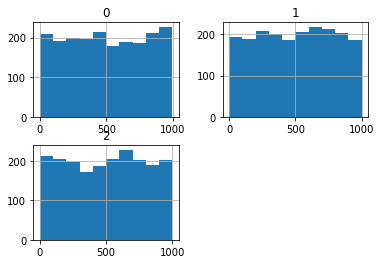

In [26]:
df.hist(column=[0,1,2])